<a href="https://colab.research.google.com/github/shivansh2310/Nerd-Stuff/blob/main/Mumbai_starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import folium
from folium import plugins
import geopy.distance
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [8]:
def get_store_lat_lngs(zcode):
    request = f'https://www.starbucks.com/store-locator?place={zcode}'
    response = requests.get(request)
    lat_lngs = re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)
    lat_lngs = [(float(item[0]), float(item[1])) for item in lat_lngs]
    return lat_lngs

## Getting all starbucks location in bombay

In [14]:
Mu_zips = pd.read_csv('/content/Mumbai_pincode.csv')

In [15]:
Mu_zips

,Location,ZIPCODE,State,District
0,A I staff colony,400029,Maharashtra,Mumbai
1,Aareymilk Colony,400065,Maharashtra,Mumbai
2,Agripada,400011,Maharashtra,Mumbai
3,Airport,400099,Maharashtra,Mumbai
4,Ambewadi,400004,Maharashtra,Mumbai
...,...,...,...,...
177,Worli,400018,Maharashtra,Mumbai
178,Worli Colony,400030,Maharashtra,Mumbai
179,Worli Naka,400018,Maharashtra,Mumbai
180,Worli Police camp,400030,Maharashtra,Mumbai


In [16]:
starbucks_locs = []


In [17]:
for i,zcode in enumerate(Mu_zips.ZIPCODE.values):
    print(f'{i} / {len(Mu_zips)}')
    starbucks_locs += get_store_lat_lngs(zcode)

0 / 182
1 / 182
2 / 182
3 / 182
4 / 182
5 / 182
6 / 182
7 / 182
8 / 182
9 / 182
10 / 182
11 / 182
12 / 182
13 / 182
14 / 182
15 / 182
16 / 182
17 / 182
18 / 182
19 / 182
20 / 182
21 / 182
22 / 182
23 / 182
24 / 182
25 / 182
26 / 182
27 / 182
28 / 182
29 / 182
30 / 182
31 / 182
32 / 182
33 / 182
34 / 182
35 / 182
36 / 182
37 / 182
38 / 182
39 / 182
40 / 182
41 / 182
42 / 182
43 / 182
44 / 182
45 / 182
46 / 182
47 / 182
48 / 182
49 / 182
50 / 182
51 / 182
52 / 182
53 / 182
54 / 182
55 / 182
56 / 182
57 / 182
58 / 182
59 / 182
60 / 182
61 / 182
62 / 182
63 / 182
64 / 182
65 / 182
66 / 182
67 / 182
68 / 182
69 / 182
70 / 182
71 / 182
72 / 182
73 / 182
74 / 182
75 / 182
76 / 182
77 / 182
78 / 182
79 / 182
80 / 182
81 / 182
82 / 182
83 / 182
84 / 182
85 / 182
86 / 182
87 / 182
88 / 182
89 / 182
90 / 182
91 / 182
92 / 182
93 / 182
94 / 182
95 / 182
96 / 182
97 / 182
98 / 182
99 / 182
100 / 182
101 / 182
102 / 182
103 / 182
104 / 182
105 / 182
106 / 182
107 / 182
108 / 182
109 / 182
110 / 182


In [18]:
starbucks_locs = set(starbucks_locs)

In [19]:
starbucks_locs = list(starbucks_locs)


In [31]:
starbucks_locs

[(19.0566, 72.85199),
 (19.03635, 72.87894),
 (19.13123, 72.82475),
 (19.21306, 72.84238),
 (19.06079, 72.86483),
 (19.23235, 72.85265),
 (19.20265, 72.96553),
 (19.14731, 72.82358),
 (19.24617, 72.85089),
 (19.1413, 72.83088),
 (18.96291, 72.80538),
 (19.02105, 73.01776),
 (18.99551, 72.82502),
 (19.06553, 72.83317),
 (19.25912, 72.98445),
 (19.02569, 72.85632),
 (19.13057, 72.82218),
 (19.05054, 72.82713),
 (19.09932, 72.87472),
 (19.09918, 72.85121),
 (19.07728, 72.90712),
 (19.09599, 72.87547),
 (19.15986, 72.94502),
 (19.02682, 72.83889),
 (19.10263, 72.87278),
 (19.11192, 72.86083),
 (19.07568, 72.83174),
 (19.00999, 72.83559),
 (19.20845, 72.97154),
 (19.18118, 72.94083),
 (19.05961, 72.83177),
 (19.11383, 72.8636),
 (19.10772, 72.8264),
 (19.15537, 72.85376),
 (19.09197, 72.85606),
 (19.01265, 72.82363),
 (19.16518, 72.85836),
 (19.09393, 72.92304),
 (19.11331, 72.83475),
 (19.0328, 72.8964),
 (18.99887, 72.82568),
 (18.995, 72.82456),
 (19.20902, 72.87266),
 (19.17388, 72.8604

In [30]:
len(starbucks_locs)

74

## Distance to the closest starbucks

In [20]:
dist_matrix = np.empty((len(starbucks_locs), len(starbucks_locs)))
for i1,s1 in enumerate(starbucks_locs):
    for i2,s2 in enumerate(starbucks_locs):
        if i1 <= i2:
            d = geopy.distance.geodesic(s1, s2).mi
            dist_matrix[i1,i2] = d
            dist_matrix[i2,i1] = d

In [21]:
np.fill_diagonal(dist_matrix, np.inf)

In [22]:
closest_locs = np.argmin(dist_matrix, axis=0)
closest_dists = dist_matrix[np.arange(len(starbucks_locs)), closest_locs]

In [40]:
import json

In [63]:
#map of Mumbai
with open('/content/mumap.geojson') as f:
    muArea = json.load(f)
    
mu_lng_lats = muArea['features'][0]['geometry']['coordinates'][0]
polygon = Polygon(mu_lng_lats)

#initialize the map around Mumbai
muMap = folium.Map(location=[19.0760,72.8777], tiles='Stamen Toner', zoom_start=9)

#add the shape of Mumbai to the map
folium.GeoJson(muArea).add_to(muMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for lat,lng in starbucks_locs:
    if polygon.contains(Point(lng,lat)):
        folium.CircleMarker((lat, lng), radius=4, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(muMap)
   
closest_dists_lim = []
closest_locs = np.argmin(dist_matrix, axis=0)
for i1,s1 in enumerate(starbucks_locs):
    if polygon.contains(Point(s1[1],s1[0])):
        s2 = starbucks_locs[closest_locs[i1]]
        d = round(closest_dists[i1], 2)
        folium.PolyLine([s1,s2], color='black', popup=f'{d} miles', fontsize=20).add_to(muMap)
        closest_dists_lim.append(d)
closest_dists_lim = np.array(closest_dists_lim)
    
#save the map as an html    
muMap.save('muMap.html')

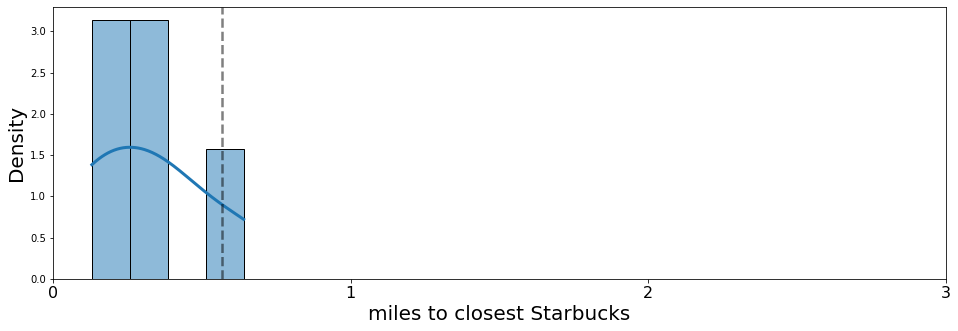

In [64]:
plt.figure(figsize=(16,5))
sns.histplot(closest_dists_lim, kde=True, line_kws={'linewidth': 3}, stat='density')
plt.xlabel('miles to closest Starbucks', fontsize=20)
plt.xticks(np.arange(0, 3.1), fontsize=16)
plt.ylabel('Density', fontsize=20)
plt.axvline(np.mean(closest_dists), color='k', linestyle='--', linewidth=2.5, alpha=0.5)

In [59]:
closest_dists_lim.min(), closest_dists_lim.max()

(0.13, 0.64)